In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

In [2]:
D = pd.read_csv('3.2Ddata.csv')
D.sample(5)

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,大类,二级类,Year,Month,Day,Hrs,Min
20037,DD2017070502420022013979C545D,E43A6E078A06874,3.5,3.5,可口可乐（500ml）,2017-11-15 15:51:00,E,已出货未退款,已提现,饮料,碳酸饮料,2017,11,15,15,51
5143,DD20170816749397599865081377,E43A6E078A06874,6.0,6.0,红牛,2017-12-14 18:40:00,E,已出货未退款,已提现,饮料,功能饮料,2017,12,14,18,40
19128,DD20170709100152665A7BFC5D034,E43A6E078A06874,3.5,3.5,冰糖雪梨,2017-11-19 11:05:00,E,已出货未退款,已提现,饮料,果蔬饮料,2017,11,19,11,5
181,DD201708167493920685391474701,E43A6E078A06874,1.5,1.5,40g双汇玉米热狗肠,2017-06-18 21:31:00,E,已出货未退款,已提现,非饮料,肉干/豆制品/蛋,2017,6,18,21,31
21819,DD20170620121344272F7B81092B9,E43A6E078A06874,1.5,1.5,好吃点小饼干,2017-11-06 18:44:00,E,已出货未退款,已提现,非饮料,饼干糕点,2017,11,6,18,44


In [3]:
data = D[D.大类 == '饮料']

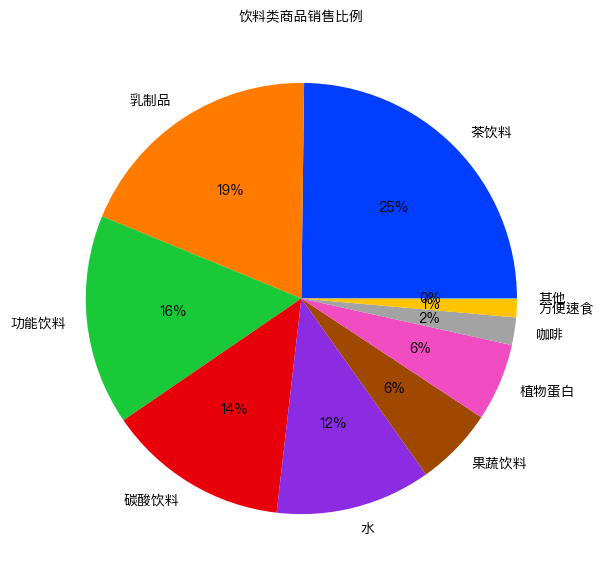

In [4]:
beverage_counts = data['二级类'].value_counts()
font_path = '/System/Library/Fonts/PingFang.ttc'
font_prop = FontProperties(fname=font_path)
colors = sns.color_palette('bright')[0:10]
plt.figure(figsize=(10, 7))
plt.pie(beverage_counts, labels=beverage_counts.index, colors=colors, autopct='%.0f%%', textprops={'fontproperties': font_prop})
plt.title('饮料类商品销售比例', fontproperties=font_prop)
plt.show()

In [5]:
df = data.groupby(['商品']).agg({'实际金额':'sum','二级类':'first'}).reset_index()

In [6]:
sorted_df = df.groupby('二级类').apply(lambda x: x.sort_values('实际金额', ascending=False).head(5)).reset_index(drop=True)
sorted_df

,商品,实际金额,二级类
0,营养快线,3532.5,乳制品
1,250ml燕塘原味酸奶,1132.0,乳制品
2,250ml燕塘甜牛奶,1021.0,乳制品
3,伊利优酸乳,1019.0,乳制品
4,250ml燕塘红枣牛奶,957.5,乳制品
5,商品1,0.3,其他
6,商品2,0.1,其他
7,脉动,4510.5,功能饮料
8,东鹏特饮,2615.0,功能饮料
9,红牛,1954.5,功能饮料


In [7]:
order_df = pd.read_csv('3-1D.csv')
order_df.head(5)

,商品,订单数量,二级类,标签
0,怡宝纯净水,1705,水,畅销
1,脉动,996,功能饮料,畅销
2,营养快线,805,乳制品,畅销
3,阿萨姆奶茶,792,茶饮料,畅销
4,东鹏特饮,709,功能饮料,畅销


In [9]:
tag_df = sorted_df.merge(order_df)
tag_df = tag_df[tag_df.标签 != '滞销'].reset_index(drop = True)

通过pie chart我们可以知道每个饮料类型的销售占比，因此对于销量占比高的（茶饮料，乳制品，水等）我们应该做好充足的库存。除此之外，我找出了销量最好的饮料，因此对于这些饮料，我们要确保他们不会断货同时也要做好即使补货的准备特别是对于有着畅销销量的饮料，这样我们的收益才会更高。同时，我们也可以探究这些饮料销量好的原因，是否是因为顾客喜欢这些饮料如果是的话，我们可以多售卖这些饮料，或者是否是因为外部因素（比如说搞活动）导致了这些饮料的销量更高，如果是这个原因我们可以通过AB testing来判断是否这些活动是真实有效的，进而我们可以推广到其他商品上去。对于那些销量不好的饮料，我们可以考虑是否是因为商品的味道的问题，然后可以考虑是否要换掉这些饮料来提高我们的收益和减少没必要的inventory cost。基于这个点，我们可以采访一下购买的用户看一下他们的想法，同时也可以询问下他们是否有我们没cover到的饮料（换句话来说就是看看所有的饮料是否有cover到大部分的受众群体）

In [10]:
path = '3.2D.csv'
tag_df.to_csv(path,index = False)